In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import scipy.stats as stats

In [119]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        self._ig = 0
        self._threshold_val = 0
        self._threshold_idx = 0
        self._left_class = 0
        self._right_class = 0
        
    # 【問題3】学習
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        
        # 親ノードのジニ不純度を求める
        gini_base = self._get_gini(X, y, None)
        
        # Xの特徴量数分繰り返す
        for i in range(X.shape[1]):
            
            # 処理対象のXのサンプル列を抽出
            X_samples = X[:,i]
            max_val = X_samples[np.argmax(X_samples)]
            min_val = X_samples[np.argmin(X_samples)]
            
            # サンプル数分繰り返す
            for j in range (len(X_samples)):
                
                # 閾値
                threshold = X_samples[j]
                
                # 端っこの閾値の場合は次のループへ進む
                if threshold == max_val or threshold == min_val:
                    continue
                
                # ジニ不純度を計算する
                gini_left, gini_right = self._get_gini( X_samples, y, threshold )
                
                # 【問題2】情報利得を求める関数
                # 情報利得を計算する
                ig = gini_base - gini_left - gini_right
                
                # 保持している情報利得より大きい場合は各値を更新する
                if self._ig < ig:
                    self._ig = ig
                    self._threshold_val = threshold
                    self._threshold_idx = i
            
        # 求めた閾値を元にデータを分割し、クラスの値を保持する
        self._split_X(X, y)
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
    # 【問題1】不純度を求める関数
    # ジニ不純度を計算する
    def _get_gini(self, X_values, y, threshold):
        
        if threshold is None:
            Nt_all = len(X_values)
            Nt_left = np.sum(y == np.unique(y)[0])
            
            # yの値が一種類の場合は右のノードのサンプル数を０にする分岐
            if len(np.unique(y)) == 1:
                Nt_right = 0
            else:
                Nt_right = np.sum(y == np.unique(y)[1])
            
            gini = 1 - ((Nt_left/Nt_all)**2 + (Nt_right/Nt_all)**2)
        
            return gini
        else:
            
            left_idx = np.where(X_values <= threshold)
            left_gini = self._get_gini(X_values[left_idx], y[left_idx], None)
            
            right_idx = np.where(X_values > threshold)
            right_gini = self._get_gini(X_values[right_idx], y[right_idx], None)
            
            return left_gini, right_gini
    
    def _split_X(self, X, y):
        
        left_node_idx = X[:,self._threshold_idx] <= self._threshold_val
        right_node_idx = X[:,self._threshold_idx] > self._threshold_val
        
        self._left_class = np.argmax(np.bincount(y[left_node_idx]))
        self._right_class = np.argmax(np.bincount(y[right_node_idx]))
        
    # 【問題4】推定
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        y_pred = []
        
        for i in range(len(X)):
            
            x_val = X[i, self._threshold_idx]
            
            if x_val <= self._threshold_val:
                y_pred.append(self._left_class)
            else:
                y_pred.append(self._right_class)
        
        return np.array(y_pred)

In [5]:
# データの準備
X = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [122]:
# 決定領域を可視化するメソッド
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 決定領域のプロット
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # マーカーとカラーマップの準備
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 決定領域のプロット
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # 各特徴量を1次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # 予測結果を元にグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # クラス毎にサンプルをプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # テストサンプルを目立たせる
    if test_idx:
        # すべてのサンプルをプロット
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

In [140]:
# 【問題5】学習と推定

# スクラッチ
scr_tree = ScratchDecesionTreeClassifierDepth1(True)
scr_tree.fit(X, y)
y_pred_scr = scr_tree.predict(X)

# 本家
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(X, y)
y_pred = clf.predict(X)

print("   スクラッチ：",y_pred_scr)
print("   本家　　　：",y_pred)



   スクラッチ： [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 1 0]
   本家　　　： [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0
 1 1 1]


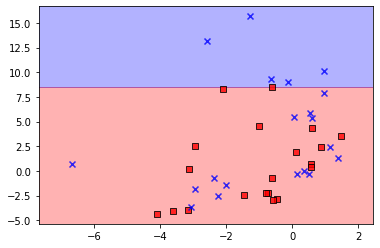

In [138]:
# 【問題6】決定領域の可視化
# スクラッチ
plot_decision_regions(X, y, scr_tree)

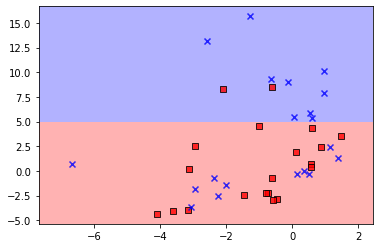

In [139]:
# 本家
plot_decision_regions(X, y, clf)